# Course 3 Assignment:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.


## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')  
import seaborn as sns

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews_cleaned = reviews.drop(reviews.columns[[6, 7]], axis=1)

# View column names.
reviews_cleaned.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews_cleaned = reviews_cleaned.rename(columns={'remuneration (k£)': 'remuneration', \
                                                  'spending_score (1-100)': 'spending_score'})

# View column names.
reviews_cleaned.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
#Check co-relation between numeric variables
reviews_cleaned.corr()

,age,remuneration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
remuneration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


## 4. Linear regression

### 4a) spending vs loyalty

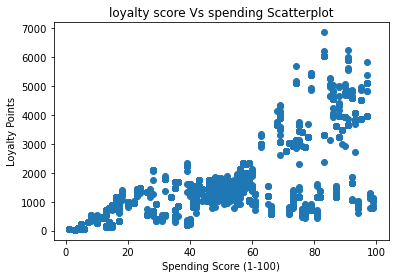

In [9]:
# Dependent variable.
y = reviews_cleaned['loyalty_points'] 

# Define the independent variable.
X = reviews_cleaned['spending_score']

# Set the title and legends for the graph.  
plt.title("loyalty score Vs spending Scatterplot")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points") 

# Check for linearity.
plt.scatter(X,y)

# Linear Regression Method-sklearn

In [10]:
# Train and test data sets
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)
# Reshape data using array reshape
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [11]:
# Specify the model.
regr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
regr.fit(X_train, y_train)  

LinearRegression()

In [12]:
print(regr.score(X_train,y_train))

0.4483889403237179


In [13]:
regr.coef_

array([[33.11355993]])

In [14]:
regr.intercept_

array([-81.62216311])

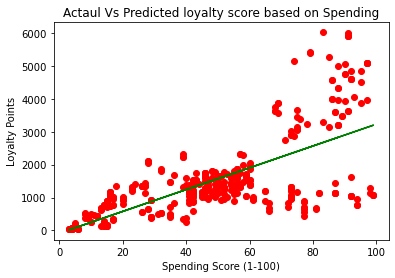

In [15]:
# Call the predictions .
y_pred = regr.predict(X_test)

# Create a scatterplot with regression line.
plt.scatter(X_test, y_test, color = 'red')  
plt.plot(X_test, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Actaul Vs Predicted loyalty score based on Spending")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show() 

## OLS Method

In [16]:
# Create formula and pass through OLS methods.
f = 'y ~ X'
test = ols(f, data = reviews_cleaned).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        18:53:19   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * X

# View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

In [19]:
# Set the X to spending score mean value 50
y_pred_1 = (-75.052663) + 33.061693 * 50

# View the output
y_pred_1

1578.031987

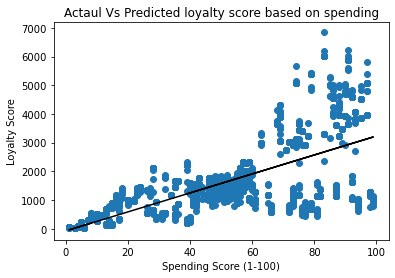

In [20]:
# Plot the graph with a regression line.

# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the title and legends for the graph.  
plt.title("Actaul Vs Predicted loyalty score based on spending")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Score") 

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

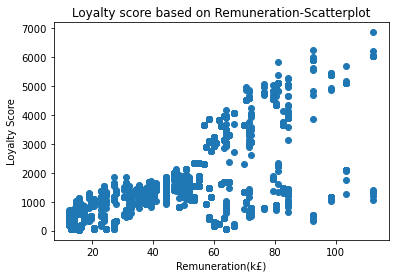

In [21]:
# Independent variable.
y = reviews_cleaned['loyalty_points'] 

# Define the independent variable.
X = reviews_cleaned['remuneration']

# Set the title and legends for the graph.  
plt.title("Loyalty score based on Remuneration-Scatterplot")
plt.xlabel("Remuneration(k£)")
plt.ylabel("Loyalty Score") 

# Check for linearity.
plt.scatter(X,y)

In [22]:
# Create formula and pass through OLS methods.
f = 'y ~ X'
test = ols(f, data = reviews_cleaned).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        18:53:21   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [24]:
# Set the X coefficient and the constant to generate the regression table.

y_pred = (-65.686513) + 34.187825 * X

# View the output
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

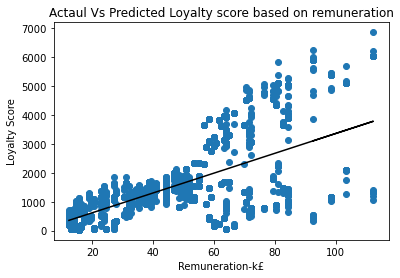

In [25]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black')

# Set the title and legends for the graph.  
plt.title("Actaul Vs Predicted Loyalty score based on remuneration")
plt.xlabel("Remuneration-k£")
plt.ylabel("Loyalty Score")

# View the plot.
plt.show()

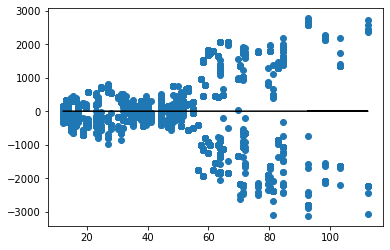

In [26]:
# Plot residuals ( y- predict - y-observe) versus the x-values
plt.scatter(X, test.predict()-y)

# Plot the regression line (in black).
plt.plot(X, y - y, color='black')

# View the plot.
plt.show()

### 5c) age vs loyalty

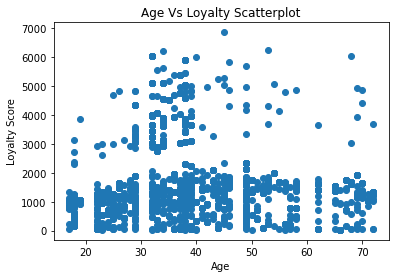

In [27]:
# Independent variable.
y = reviews_cleaned['loyalty_points']  #loyalty points

# Define the independent variable.
X = reviews_cleaned['age']

# Set the title and legends for the graph.  
plt.title("Age Vs Loyalty Scatterplot")
plt.xlabel("Age")
plt.ylabel("Loyalty Score")

# Check for linearity.
plt.scatter(X,y)# Independent variable.

# Multiple linear Regression

### Set the variables, fitting the model, and calling the predictions for X

In [28]:
# Define the dependent variable.
y = reviews_cleaned['loyalty_points']  #loyalty points

# Define the independent variable.
X = reviews_cleaned[['remuneration','spending_score']]

In [29]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [30]:
# Call the predictions for X (array).
mlr.predict(X)  

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

## Check the value of R-squared, the intercept and the coefficients

In [31]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('remuneration', 33.97949882180283), ('spending_score', 32.892694687821006)]

### Train and test subsets with (MLR) multiple linear regression

In [32]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [33]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:53:23   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.

### Run a regression test

In [34]:
## Train the model
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1218.46660121   618.29301891  2312.04851244 ...  1452.7136095
 -1006.77936277  1203.19986663]


In [35]:
# Test the model
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

Prediction for test set: [ 1.43311406e+03  3.38498142e+03  1.68174774e+03  1.59972741e+03
  1.05209014e+03  1.17026310e+03  3.41036952e+03  1.05209014e+03
  3.25925979e+03  2.23910009e+03 -2.03602914e+02  4.81806858e+02
  1.25121581e+02  1.20319987e+03  1.26907340e+03  1.41158500e+03
  1.19739315e+02  1.56679064e+03  3.16711810e+03  2.23910009e+03
  1.66560094e+03  2.08389444e+03  1.45271361e+03 -6.55239460e+02
  4.41052339e+03  2.99705200e+03  3.41317910e+03  1.56550430e+03
 -7.15730728e+02  1.57819835e+03  1.44645128e+03  4.20816370e+03
  1.32804143e+03  3.89839558e+03  1.23677981e+03  1.99022952e+03
 -1.11461224e+02  6.96217428e+02  2.16117568e+03  8.16556791e+02
  1.73749992e+03  9.49827093e+02  1.03313377e+03  1.56679064e+03
 -8.46834623e+02  1.50027394e+03  1.21332123e+03  1.67162638e+03
 -1.06188836e+03  1.61651738e+03  1.53063802e+03 -1.07803516e+03
  3.01793790e+03  1.60703919e+03 -2.52956378e+00  1.59908424e+03
  1.41287134e+03  1.21846660e+03  1.40877542e+03  3.93735779e+03


### Check for multicollinearity with Python

In [36]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        9.45           const
1        1.00    remuneration
2        1.00  spending_score


# Evaluate the model

In [37]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 446.67056349246894
Mean Square Error (Final): 323161.11611347925


# Observations and insights

In Case of MLR R square is close to 1 explanatory power is strong hence 82 percent of variation of loyalty score explained by Renumeration and spending score together but bigger absolute error.

Simple linear regression models are not much accurate 






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [38]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression to predict Customer educational Background

In [39]:
# Load the CSV file(s)
reviews_log = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
reviews_log['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [40]:
# All non numeric columns drop them.
reviews_log.drop(['gender','language','platform','product','review','summary'], axis=1, inplace=True)

# Explore the data.
reviews_log = reviews_log.rename(columns={'remuneration (k£)': 'Remuneration', \
                                              'spending_score (1-100)': 'Spending_score'})

# View DataFrame.
reviews_log.head()

,age,Remuneration,Spending_score,loyalty_points,education
0,18,12.30,39,210,graduate
1,23,12.30,81,524,graduate
2,22,13.12,6,40,graduate
3,25,13.12,77,562,graduate
4,33,13.94,40,366,graduate


In [41]:
# Create two lists: one with initial and one with new values.
intial_vals = ['graduate', 'postgraduate', 'PhD', 
               'diploma', 'Basic']

new_vals = ['Graduate', 'Highly-edu', 'Highly-edu', 'Under-Grad', 'Under-Grad']

# Create a for loop to replace the values.
for old_val, new_val in zip(intial_vals, new_vals):
    reviews_log.loc[reviews_log['education'].str.fullmatch(old_val),'education' ] = new_val

# Display all the unique values/check changes.
reviews_log['education'].unique() 

array(['Graduate', 'Highly-edu', 'Under-Grad'], dtype=object)

In [42]:
# View DataFrame.
reviews_log['education'].value_counts()

Graduate      900
Highly-edu    860
Under-Grad    240
Name: education, dtype: int64

Text(0.5, 1.0, 'Education Value Counts')

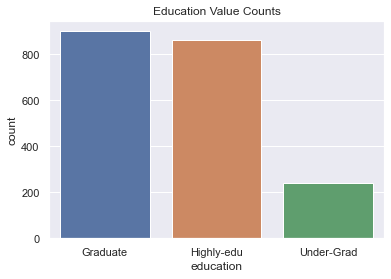

In [43]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='education', data=reviews_log)
ax.set_title('Education Value Counts')

# Prepare the data

In [44]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Set the variables:
X = reviews_log.drop(['education'], axis = 1)
y = reviews_log['education']

# SMOTE to balance data

In [45]:
# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['education'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   age  Remuneration  Spending_score  loyalty_points
0   45         98.40              16            1156
1   26         31.98              65            1187
2   38         44.28              53            1641
3   38         49.20              40            1376
4   42         22.96              32             531


,education
0,Graduate
1,Graduate
2,Highly-edu
3,Highly-edu
4,Highly-edu


In [46]:
# Determine if data set is balanced.
os_data_y['education'].value_counts()

Graduate      629
Highly-edu    629
Under-Grad    629
Name: education, dtype: int64

# Eliminate multicollinearity


In [47]:
# Import the necessary package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = os_data_X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(os_data_X.values, i)
                          for i in range(len(os_data_X.columns))]
 
# View the DataFrame.
vif_data

,feature,VIF
0,age,5.658230
1,Remuneration,8.691892
2,Spending_score,7.595358
3,loyalty_points,9.612729


# Build Model

In [48]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# Create a function and set values.
scaler = MinMaxScaler(feature_range = (0, 1))  

# Add the X_train data set to the 'scaler' function.
scaler.fit(os_data_X)

# Specify X_train data set.
X_train = scaler.transform(os_data_X) 
# Specify X_test data set. 
X_test = scaler.transform(X_test)

# Define the MLR model and set predictions and parameters.
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, os_data_y)

# Set the predictions equal to the ‘MLR’ function and 
# specify the DataFrame.
preds = MLR.predict(X_test) 

# Set the parameters equal to the DataFrame and 
# add the ‘get_params’ function. 
params = MLR.get_params() 

# Print the parameters, intercept, and coefficients.
print(params)  
print("Intercept: \n", MLR.intercept_)
print("Coefficients: \n", MLR.coef_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [ 0.43471657 -0.50308672  0.06837014]
Coefficients: 
 [[-1.44953271 -0.14266312  0.72922746 -0.39046491]
 [-0.13458143  1.66305127  1.53086193 -2.88379165]
 [ 1.58411414 -1.52038815 -2.26008939  3.27425656]]


## Fit The Model

In [49]:
# Name the model and set the model to the function.
# Use the add_constant() function to determine the value of y when X=0.
logit_model = sm.MNLogit(os_data_y, sm.add_constant(X_train))

# Specify how the function returns the results.
result = logit_model.fit()  

# Print the report as a result.summary() function: 
print("Summary for Education :\n ", result.summary())

Optimization terminated successfully.
         Current function value: 1.027168
         Iterations 6
Summary for Education :
                            MNLogit Regression Results                          
Dep. Variable:              education   No. Observations:                 1887
Model:                        MNLogit   Df Residuals:                     1877
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Dec 2022   Pseudo R-squ.:                 0.06503
Time:                        18:53:28   Log-Likelihood:                -1938.3
converged:                       True   LL-Null:                       -2073.1
Covariance Type:            nonrobust   LLR p-value:                 1.179e-53
education=Highly-edu       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9378      0.292     -3.211      0.0

#  Create a confusion matrix

In [50]:
# Create and print a confusion matrix:

# y_test as the first argument and the predictions as the second argument. 
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array. 
pd.DataFrame(cmatrix, index=['Graduate','Highly-edu','Under-Grad'],
columns=['predicted_Graduate', 'predicted_Highly-edu','predicted_Under-Grad'])

,predicted_Graduate,predicted_Highly-edu,predicted_Under-Grad
Graduate,151,33,87
Highly-edu,121,46,91
Under-Grad,15,4,52


In [51]:
from sklearn.metrics import classification_report
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

Accuracy score: 0.415
              precision    recall  f1-score   support

    Graduate       0.53      0.56      0.54       271
  Highly-edu       0.55      0.18      0.27       258
  Under-Grad       0.23      0.73      0.35        71

    accuracy                           0.41       600
   macro avg       0.44      0.49      0.39       600
weighted avg       0.50      0.41      0.40       600



# Week 2 assignment: Clustering with k-means using Python
The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments

In [52]:
# Import CSV file to dataframe
Clustering_df = pd.read_csv('turtle_reviews.csv')
Clustering_df.info()

#Created Dummy dataframe to check scaling impact
Clustering_all = Clustering_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [53]:
# Descriptive statistics with categorical values
Clustering_all.describe(include = 'all')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


In [54]:
# Drop unnecessary columns.
Clustering_df.drop(Clustering_df.columns[[0,1,4,5,6,7,8,9,10]], axis=1, inplace = True)

# View DataFrame.
Clustering_df.head()

,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [55]:
# Explore the data.
Clustering_df = Clustering_df.rename(columns={'remuneration (k£)': 'Remuneration', \
                                              'spending_score (1-100)': 'Spending_score'})

Clustering_df.head()

,Remuneration,Spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [56]:
# Descriptive statistics.
Clustering_df.describe()

,Remuneration,Spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='Remuneration', ylabel='Spending_score'>

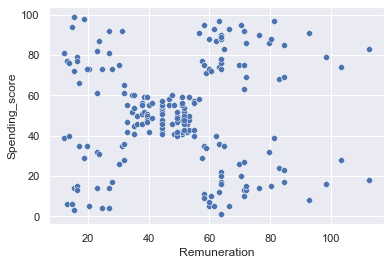

In [57]:
#Plot the remuneration versus spending score to determine any correlations and possible groups (clusters). 

# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='Remuneration',
                y='Spending_score',
                data=Clustering_df
                )

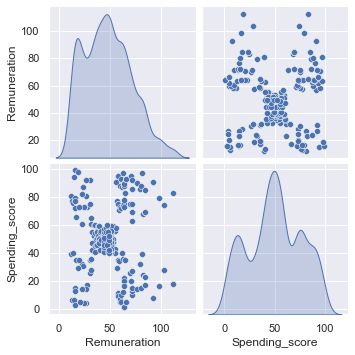

In [58]:
# Create a pairplot with Seaborn.
X = Clustering_df[['Remuneration','Spending_score']]
sns.pairplot(Clustering_df,
             vars=X,
             diag_kind='kde')

In [59]:
# scaling
from sklearn.preprocessing import StandardScaler
Clustering_df.loc[:,:]= StandardScaler().fit_transform(Clustering_df.loc[:,:])

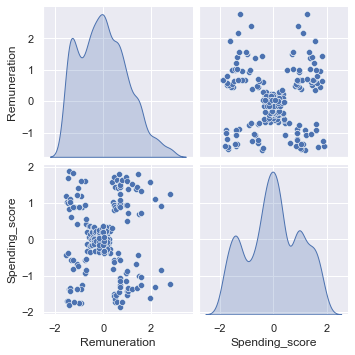

In [60]:
# Create a pairplot with Seaborn.
x = Clustering_df[['Remuneration','Spending_score']]
sns.pairplot(Clustering_df,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

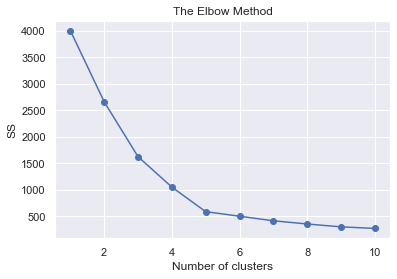

In [61]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

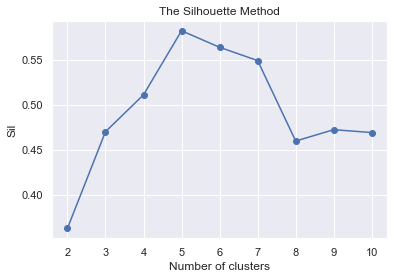

In [62]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

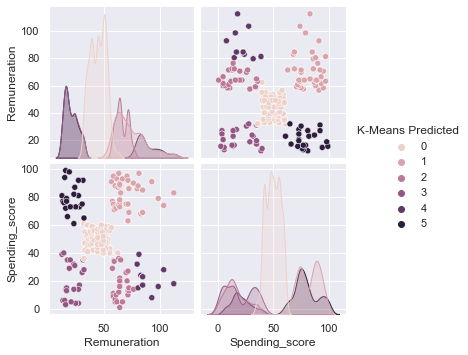

In [63]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [64]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [65]:
X.sort_values(by =['K-Means Predicted'], inplace = True)

print(X.head(10))

      Remuneration  Spending_score  K-Means Predicted
1448         32.80              47                  0
1090         48.38              55                  0
1089         47.56              46                  0
1088         47.56              60                  0
1087         46.74              55                  0
1086         46.74              58                  0
1085         44.28              46                  0
1084         44.28              57                  0
1083         44.28              44                  0
1082         44.28              41                  0


In [66]:
x5 = X[X['K-Means Predicted'] == 4] 
x6 = X[X['K-Means Predicted'] == 5] 
x2 = X[X['K-Means Predicted'] == 1]

In [67]:
print("Mean of Cluster 5 is:","\n", x5.describe().loc['mean'])

print("\n")

print("Mean of Cluster 6 is:","\n", x6.describe().loc['mean'])

print("\n")

print("Mean of Cluster 2 is:","\n", x2.describe().loc['mean'])

Mean of Cluster 5 is: 
 Remuneration         89.666667
Spending_score       21.178862
K-Means Predicted     4.000000
Name: mean, dtype: float64


Mean of Cluster 6 is: 
 Remuneration         20.353680
Spending_score       79.416357
K-Means Predicted     5.000000
Name: mean, dtype: float64


Mean of Cluster 2 is: 
 Remuneration         73.240281
Spending_score       82.008427
K-Means Predicted     1.000000
Name: mean, dtype: float64


# K=5

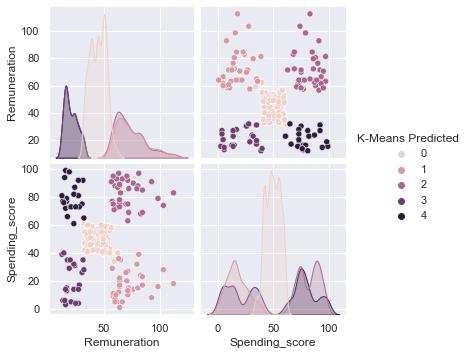

In [68]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [69]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

0    774
2    356
1    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

In [70]:
# Check the number of observations per predicted class.
x1 = X[X['K-Means Predicted'] == 0] 
x2 = X[X['K-Means Predicted'] == 1] 
x3 = X[X['K-Means Predicted'] == 2] 
x4 = X[X['K-Means Predicted'] == 3] 
x5 = X[X['K-Means Predicted'] == 4] 

print("Mean of Cluster 1 is:","\n", x1.describe().loc['mean'])
print("\n")
print("Mean of Cluster 2 is:","\n", x2.describe().loc['mean'])
print("\n")
print("Mean of Cluster 3 is:","\n", x3.describe().loc['mean'])
print("\n")
print("Mean of Cluster 4 is:","\n", x4.describe().loc['mean'])
print("\n")
print("Mean of Cluster 5 is:","\n", x5.describe().loc['mean'])

Mean of Cluster 1 is: 
 Remuneration         44.418786
Spending_score       49.529716
K-Means Predicted     0.000000
Name: mean, dtype: float64


Mean of Cluster 2 is: 
 Remuneration         74.831212
Spending_score       17.424242
K-Means Predicted     1.000000
Name: mean, dtype: float64


Mean of Cluster 3 is: 
 Remuneration         73.240281
Spending_score       82.008427
K-Means Predicted     2.000000
Name: mean, dtype: float64


Mean of Cluster 4 is: 
 Remuneration         20.424354
Spending_score       19.763838
K-Means Predicted     3.000000
Name: mean, dtype: float64


Mean of Cluster 5 is: 
 Remuneration         20.353680
Spending_score       79.416357
K-Means Predicted     4.000000
Name: mean, dtype: float64


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='Remuneration', ylabel='Spending_score'>

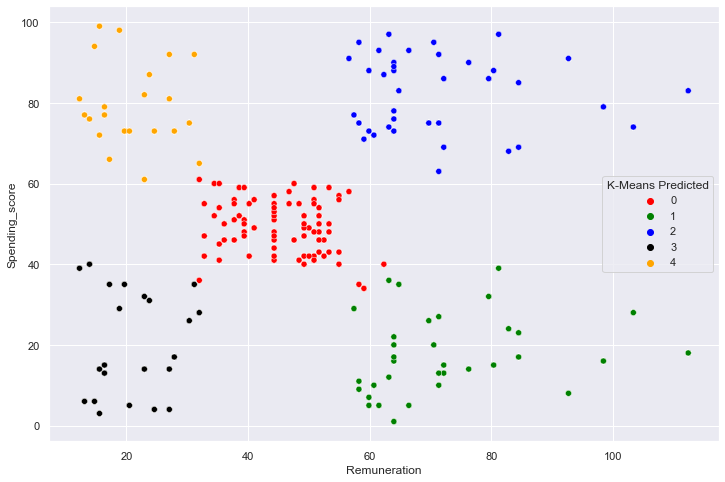

In [71]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='Remuneration' , 
                y ='Spending_score',
                data=X ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])


## 7. Discuss: Insights and observations



The number of predicted values per class indicates a better distribution for k=5 than k=6.

# NLP To Explore Social Media Reviews

## 1. Load and explore the data

In [73]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [74]:
# Load the data set 
reviews_nlp = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
reviews_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [75]:
# Keep necessary columns. Drop unnecessary columns.
Customer_reviews = reviews_nlp[['review','summary']]

# View DataFrame.
Customer_reviews.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [76]:
# Determine if there are any missing values.
print(Customer_reviews.isnull().sum())

review     0
summary    0
dtype: int64


### Drop rows from the table that do not have any value for their COMMENTS field

In [ ]:
# Drop the empty rows.
Customer_reviews.dropna(subset=['review'], inplace=True)
Customer_reviews.dropna(subset=['summary'], inplace=True)

# View the shape of the DataFrame.
Customer_reviews.info()

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [77]:
# Review: Change all to lower case and join with a space.
Customer_reviews['review'] = Customer_reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
Customer_reviews['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [78]:
# Summary: Change all to lower case and join with a space.
# Transform data to lowercase.
Customer_reviews['summary'] = Customer_reviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
Customer_reviews['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [79]:
# Remove punctuation.
Customer_reviews['review'] = Customer_reviews['review'].str.replace('[^\w\s]','')

# Preview the result.
Customer_reviews['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [80]:
# Remove punctuation.
Customer_reviews['summary'] = Customer_reviews['summary'].str.replace('[^\w\s]','')

# Preview the result.
Customer_reviews['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [81]:
# duplicates in both columns.
print (Customer_reviews.summary.duplicated().sum())
print (Customer_reviews.review.duplicated().sum())

649
50


In [82]:
# Drop duplicates.
Final_reviews = Customer_reviews.drop_duplicates(subset=['summary'])

# Preview data.
Final_reviews.reset_index(inplace=True)
Final_reviews.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [83]:
# Drop duplicates.
Final_reviews = Final_reviews.drop_duplicates(subset=['review'])

# Preview data.
Final_reviews.reset_index(inplace=True)
Final_reviews.head()

,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [84]:
Final_reviews.shape

(1350, 4)

## 3. Check wordclouds

In [85]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
# Create an empty string variable.
review_all = ''

# String all the review comments together in a single variable.
for i in range(Final_reviews.shape[0]):
    # Add each token to the list.
    review_all = review_all + Final_reviews['review'][i]


In [87]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

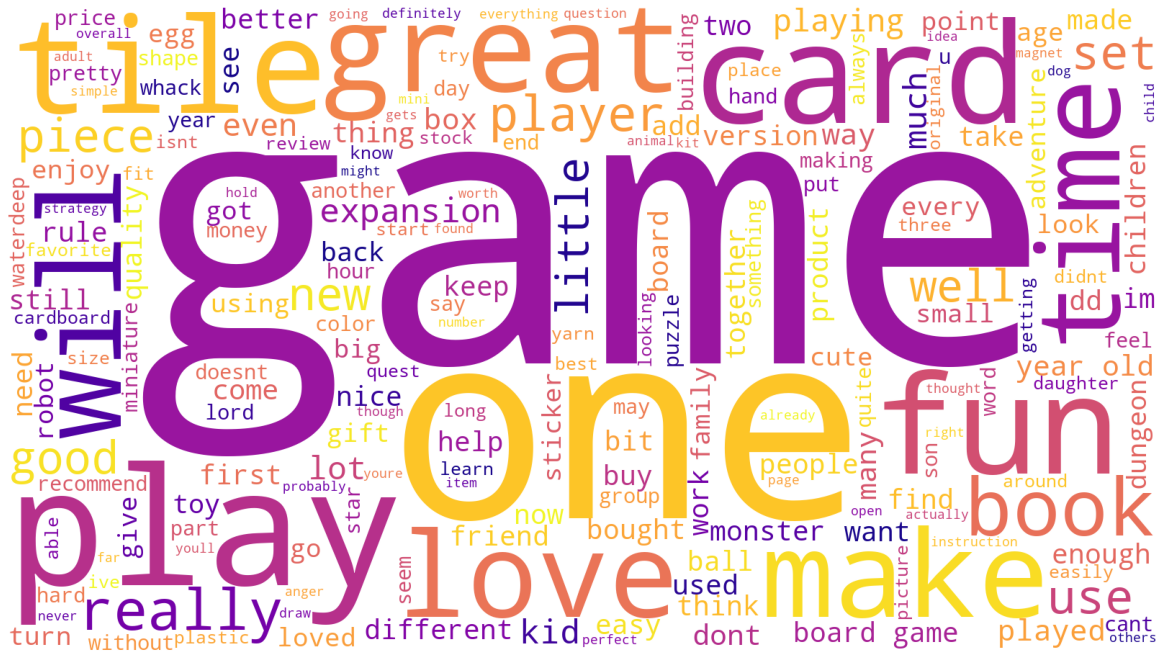

In [88]:
# Review: Plot the WordCloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_all) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Tokenisation and Visualise most frequently used tokens of relevance in a word cloud 

### Tokenisation

In [89]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
# Tokenise the words.
Final_reviews['review'] = Final_reviews['review'].apply(word_tokenize)

# Preview data.
Final_reviews['review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object

In [91]:
# Define an empty list of tokens.
all_Rtokens = []

for i in range(Final_reviews.shape[0]):
    # Add each token to the list.
    all_Rtokens = all_Rtokens + Final_reviews['review'][i]

In [92]:
# Tokenise the words.
Final_reviews['summary'] = Final_reviews['summary'].apply(word_tokenize)

# Preview data.
Final_reviews['summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object

In [93]:
# Define an empty list of tokens.
all_Stokens = []

for i in range(Final_reviews.shape[0]):
    # Add each token to the list.
    all_Stokens = all_Stokens + Final_reviews['summary'][i]


### 4a) Create frequency distribution

In [94]:
# Define an empty list of tokens Reviews.
all_Rtokens = []

for i in range(Final_reviews.shape[0]):
    # Add each token to the list.
    all_Rtokens = all_Rtokens + Final_reviews['review'][i]

In [95]:
# Define an empty list of tokens Summary.
all_Stokens = []

for i in range(Final_reviews.shape[0]):
    # Add each token to the list.
    all_Stokens = all_Stokens + Final_reviews['summary'][i]

In [96]:
# Determine the frequency distribution for reviews
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_Rtokens)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

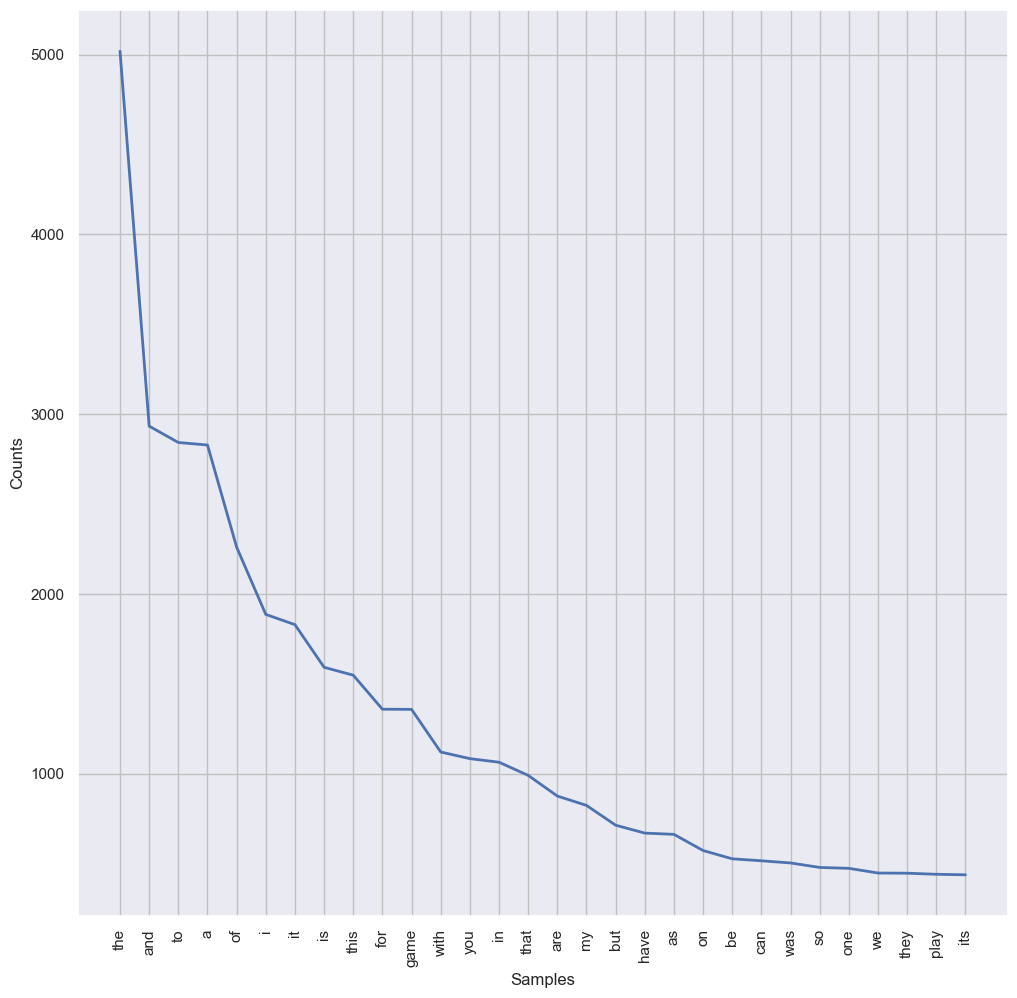

In [97]:
#5. Visualise the words
# Import the package.
import matplotlib.pyplot as plt

# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 12)

# Plot the data set.
fdist.plot(30, cumulative=False)

# Display the result.
plt.show()

### 4b) Remove alphanumeric characters and stopwords

In [100]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_R = [word for word in all_Rtokens if word.isalnum()]

tokens_S = [word for word in all_Stokens if word.isalnum()]

In [101]:
# Remove all the stopwords---Review
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokensR = [x for x in tokens_R if x.lower() not in english_stopwords]

# Define an empty string variable.
tokensR_string = ''

for value in tokensR:
    # Add each filtered token word to the string.
    tokensR_string = tokensR_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Remove all the stopwords---Summary
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokensS = [x for x in tokens_S if x.lower() not in english_stopwords]

# Define an empty string variable.
tokensS_string = ''

for value in tokensR:
    # Add each filtered token word to the string.
    tokensS_string = tokensS_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

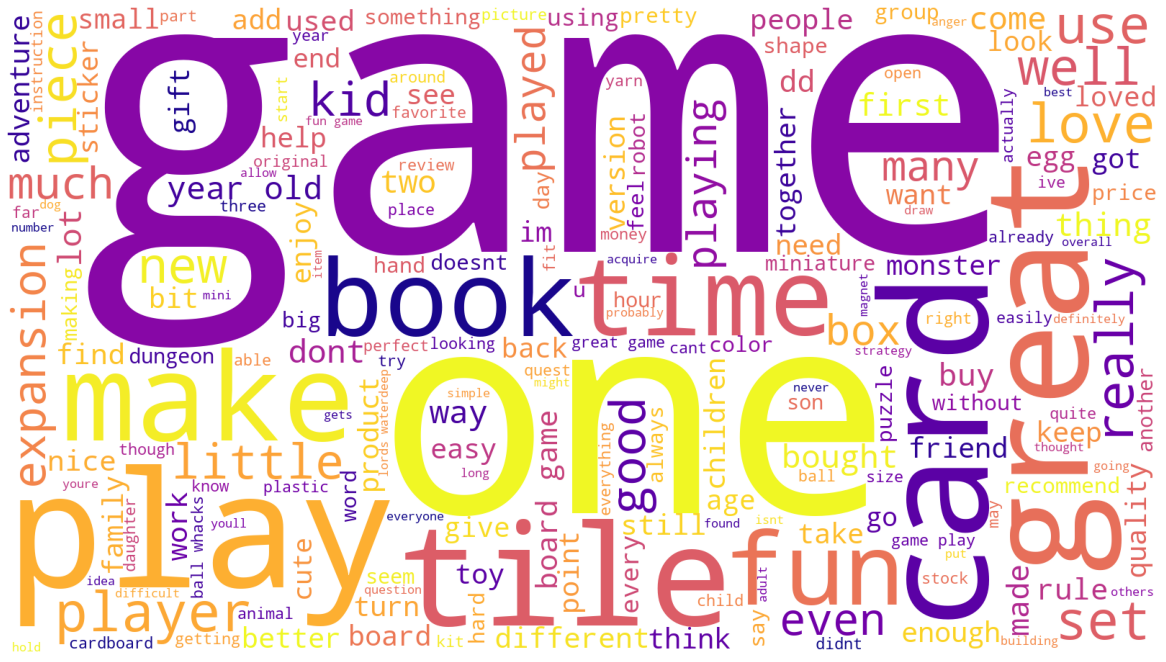

In [103]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokensR_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


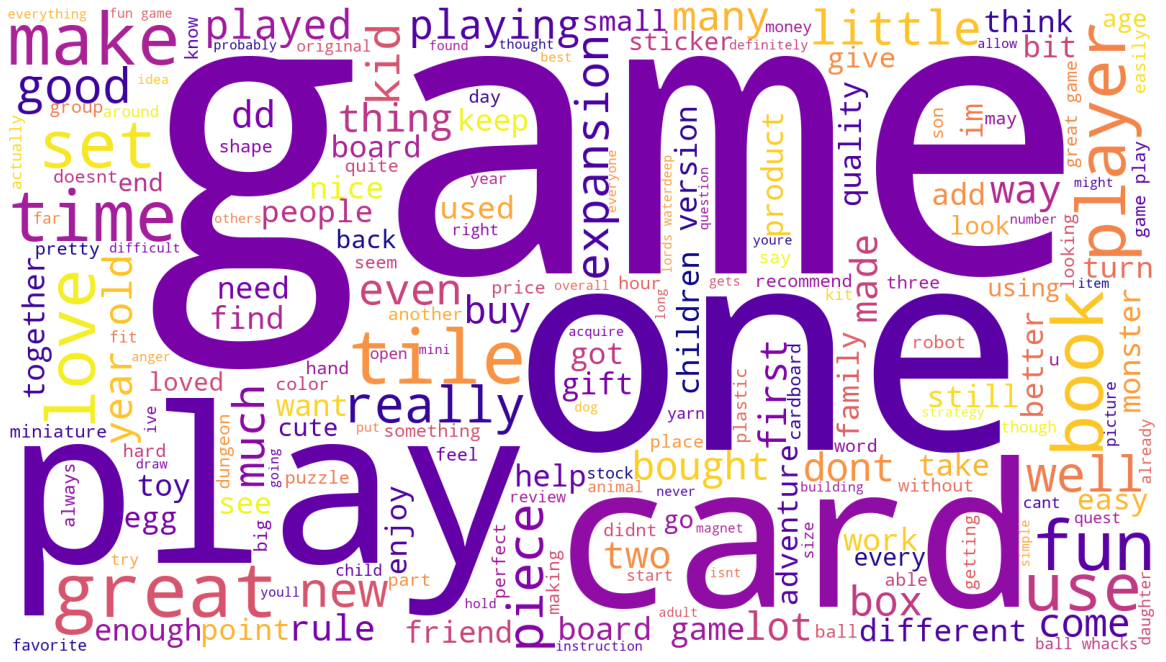

In [104]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokensS_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [105]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist_R = FreqDist(tokensR)

# Preview the data.
fdist_R

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [106]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokensR).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


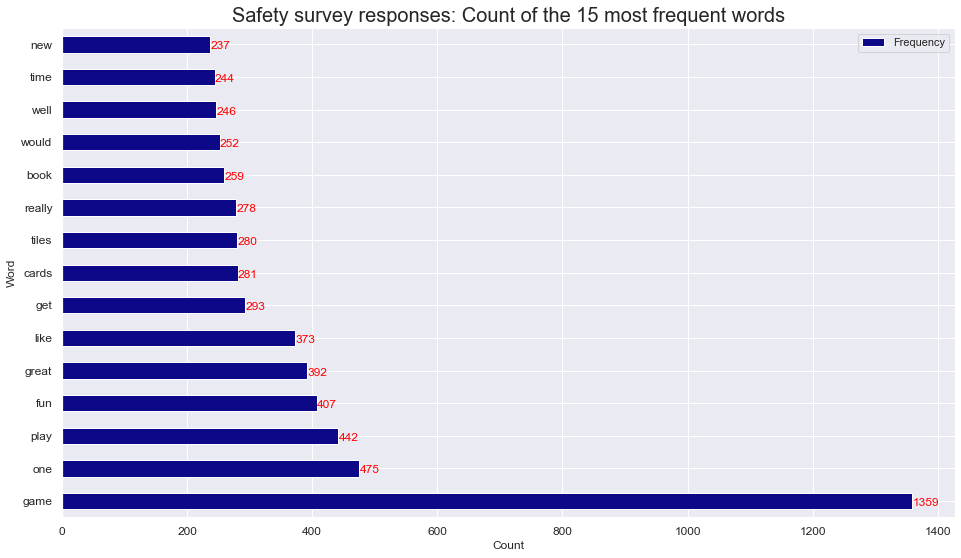

In [107]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [108]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist_S = FreqDist(tokensS)

# Preview the data.
fdist_S

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [109]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

In [110]:
#Calculate sentiment polarity score
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
Customer_reviews['polarity_Rev'] = Customer_reviews['review'].apply(generate_polarity)

# Preview the result.
Customer_reviews['polarity_Rev'].head()


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_Rev, dtype: float64

In [111]:
#Calculate subjectivity score
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
Customer_reviews['subjectivity_rev'] = Customer_reviews['review'].apply(generate_subjectivity)

# Preview the result.
Customer_reviews['subjectivity_rev'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_rev, dtype: float64

In [112]:
#Calculate sentiment polarity score
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
Customer_reviews['polarity_sum'] = Customer_reviews['summary'].apply(generate_polarity)

# Preview the result.
Customer_reviews['polarity_sum'].head()


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_sum, dtype: float64

In [113]:
#Calculate subjectivity score
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
Customer_reviews['subjectivity_sum'] = Customer_reviews['summary'].apply(generate_subjectivity)

# Preview the result.
Customer_reviews['subjectivity_sum'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_sum, dtype: float64

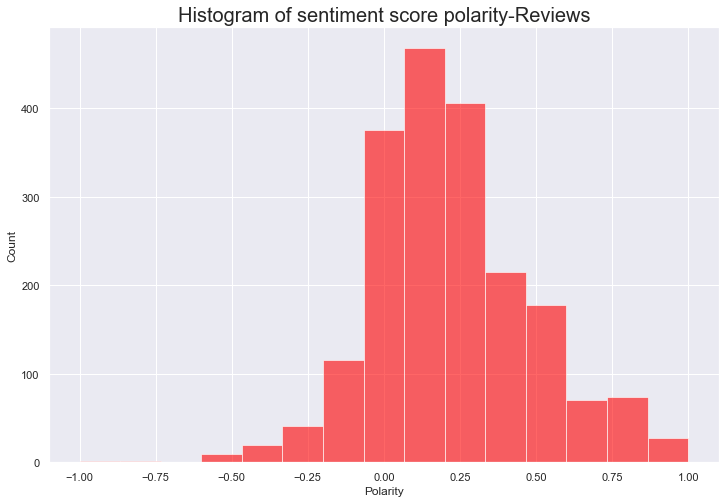

In [127]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15

# Set the plot area.
plt.figure(figsize=(12,8))

# Define the bars.
n, bins, patches = plt.hist(Customer_reviews['polarity_Rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity-Reviews', fontsize=20)

plt.show()
# Histogram of sentiment score


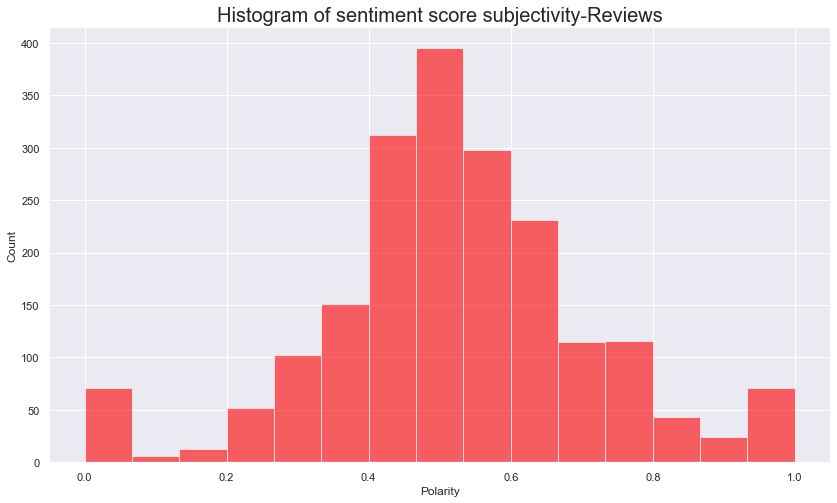

In [129]:
num_bins = 15

# Set the plot area.
plt.figure(figsize=(14,8))

# Define the bars.
n, bins, patches = plt.hist(Customer_reviews['subjectivity_rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity-Reviews', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [116]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = Customer_reviews.nsmallest(20, 'polarity_Rev')

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,summary,polarity_Rev,subjectivity_rev,polarity_sum,subjectivity_sum
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000,-1.000000,1.000000
182,incomplete kit very disappointing,incomplete kit,-0.780000,0.910000,0.000000,0.000000
1804,im sorry i just find this product to be boring and to be frank juvenile,disappointing,-0.583333,0.750000,-0.600000,0.700000
364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game,-0.550000,0.300000,-0.550000,0.300000
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers,-0.500000,0.900000,0.000000,0.000000
227,this was a gift for my daughter i found it difficult to use,two stars,-0.500000,1.000000,0.000000,0.000000
230,i found the directions difficult,three stars,-0.500000,1.000000,0.000000,0.000000
290,instructions are complicated to follow,two stars,-0.500000,1.000000,0.000000,0.000000
301,difficult,three stars,-0.500000,1.000000,0.000000,0.000000
1524,expensive for what you get,two stars,-0.500000,0.700000,0.000000,0.000000


In [117]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = Customer_reviews.nsmallest(20, 'polarity_sum')


# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,review,summary,polarity_Rev,subjectivity_rev,polarity_sum,subjectivity_sum
21,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,the worst value ive ever seen,0.050000,0.556250,-1.000000,1.000000
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000,-1.000000,1.000000
829,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,boring,0.156399,0.469546,-1.000000,1.000000
1166,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,before this i hated running any rpg campaign dealing with towns because it,-0.133333,0.733333,-0.900000,0.700000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9,0.035952,0.442976,-0.800000,0.900000
144,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,disappointed,0.108173,0.524519,-0.750000,0.750000
631,eggs split and were unusable,disappointed,0.000000,0.000000,-0.750000,0.750000
793,my mom already owned an acquire game but she always commen

In [118]:
#Extract positive comments
# Create a DataFrame.
positive_sentiment = Customer_reviews.nlargest(20, 'polarity_Rev')

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,summary,polarity_Rev,subjectivity_rev,polarity_sum,subjectivity_sum
7,came in perfect condition,five stars,1.000000,1.000000,0.000000,0.000000
165,awesome book,five stars,1.000000,1.000000,0.000000,0.000000
194,awesome gift,five stars,1.000000,1.000000,0.000000,0.000000
496,excellent activity for teaching selfmanagement skills,five stars,1.000000,1.000000,0.000000,0.000000
524,perfect just what i ordered,five stars,1.000000,1.000000,0.000000,0.000000
591,wonderful product,five stars,1.000000,1.000000,0.000000,0.000000
609,delightful product,five stars,1.000000,1.000000,0.000000,0.000000
621,wonderful for my grandson to learn the resurrection story,five stars,1.000000,1.000000,0.000000,0.000000
790,perfect,aquire game,1.000000,1.000000,-0.400000,0.400000
933,awesome,five stars,1.000000,1.000000,0.000000,0.000000


In [119]:
#Extract positive comments
# Create a DataFrame.
positive_sentiment = Customer_reviews.nlargest(20, 'polarity_sum')

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,review,summary,polarity_Rev,subjectivity_rev,polarity_sum,subjectivity_sum
6,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,best gm screen ever,0.660000,0.700000,1.000000,0.300000
28,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,wonderful designs,0.541667,0.658333,1.000000,1.000000
32,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,perfect,0.750000,1.000000,1.000000,1.000000
80,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,theyre the perfect size to keep in the car or a diaper,0.406250,0.750000,1.000000,1.000000
134,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,perfect for preschooler,0.090476,0.461905,1.000000,1.000000
140,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,awesome sticker activity for the price,0.318750,0.458333,1.000000,1.000000
161,my 8 year old son loves this drawing book loves it,awesome book,0.100000,0.200000,1.000000,1.000000
163,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,he was very happy with his gift,0.500000,0.500000,1.000000,1.000000
187,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,awesome,0.326042,0.708333,1.000000,1.000000
210,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,awesome and welldesigned for 9 year olds,0.192222,0.593889,1.000000,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 8. Identify named entities¶

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [120]:
#Install and import the spaCy library.
!pip install spaCy
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [122]:
Customer_reviews['named_entities'] = Customer_reviews['review'].apply(generate_named_entities)

Customer_reviews.head()

,review,summary,polarity_Rev,subjectivity_rev,polarity_sum,subjectivity_sum,named_entities
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.486111,0.15,0.500000,"[(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]"
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,0.442976,-0.80,0.900000,"[(galeforce9, ORG)]"
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.430435,0.00,0.733333,"[(two, CARDINAL), (one, CARDINAL), (one, CARDI..."
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.784848,0.00,0.000000,[]
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.316667,0.00,0.000000,"[(gf9s, ORG)]"


# 9. Visualise named entities

In [123]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if Customer_reviews['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(Customer_reviews['review'][i]), style='ent', jupyter=True)

# 